<a href="https://colab.research.google.com/github/jidemaestri/Machine-Learning/blob/master/MNIST_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import sklearn
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
type(mnist)

sklearn.utils.Bunch

### Data Manipulation

In [5]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X[0].shape

(784,)

In [7]:

def plot_digit(image_data):
    image = image_data.reshape(28, 28) #reshape of the input - ensure 28x28 
    plt.imshow(image, cmap="binary")      #imshow
    plt.axis("on")


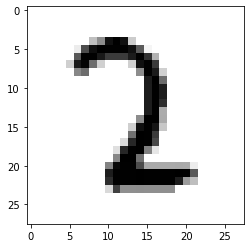

In [8]:

some_digit = X[24124]
plot_digit(some_digit)
plt.show()

In [9]:
y[3814]      #result - label

'6'

### Data preparation

In [10]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]


### Binary Classifier

Capable of detect '6' and 'non-6'

In [11]:
y_train_6 = (y_train == '6')  # True for all 5s, False for all other digits
y_test_6 = (y_test == '6')

In [12]:
print(y_train_6)

[False False False ... False False False]


In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])


array([False])

#### Performance

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.97501909, 0.97856325, 0.96678121])

### Confusion Matrix

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)   #predicting with the model trained before (sgd_clf)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_6, y_train_pred)                  #comparing the real values and the predicted with the CM
cm

array([[48766,   798],
       [  662,  4774]])

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_6, y_train_pred)               #prec = TP/TP+FP

0.8567839195979899

In [19]:
recall_score(y_train_6, y_train_pred)  # == Recall = TP / TP + FN

0.8782192788815305

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_6, y_train_pred)

0.8673691860465116

### ROC Curve

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3,
                             method="decision_function")

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_6, y_scores)

In [24]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

IndexError: ignored

In [25]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

NameError: ignored

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_6, y_scores)

0.9867893914255339

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [28]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv=3,
                                    method="predict_proba")

In [29]:
y_probas_forest.shape

(55000, 2)

In [30]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_6, y_scores_forest)

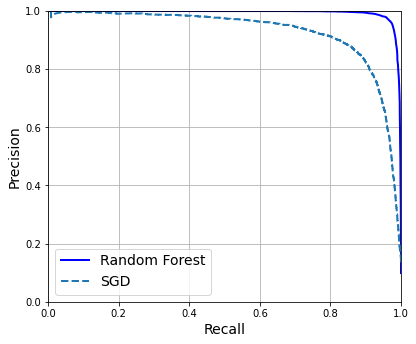

In [31]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")

plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

In [32]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%


In [33]:
roc_auc_score(y_train_6, y_scores_forest)

0.998845445530055

In [34]:
precision_score(y_train_6, y_train_pred_forest)

0.9871919270327965

In [35]:
recall_score(y_train_6, y_train_pred_forest)

0.9357983811626196

## Multiclass classification

In [36]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [37]:
svm_clf.predict([some_digit])


array(['2'], dtype=object)

In [38]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)           #punctuation of each possible value

array([[-0.29,  7.22,  9.3 ,  7.26,  0.73,  2.78,  1.74,  6.15,  6.2 ,
         3.78]])

In [39]:
class_id = some_digit_scores.argmax()
class_id

2

In [40]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.87580452, 0.8618884 , 0.87356134])

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8984946 , 0.89777996, 0.89756177])

### Error Analysis

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


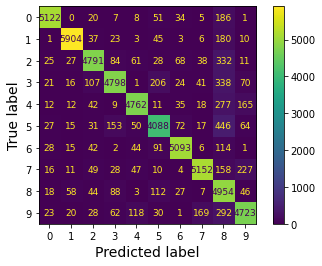

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

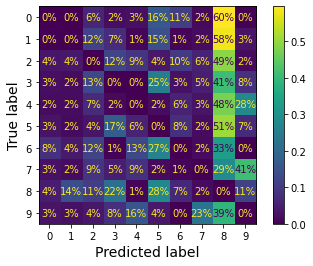

In [43]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

### Multilabel Classification

In [44]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [45]:
knn_clf.predict([some_digit])

array([[False, False]])

In [46]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9752345436553632

In [47]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9767602965842553

SVC is a classifier which not supports multilabel classification. To solve this, we can organize models in a chain.

SK Learn has a class >> Classifier Chain.

Defining the classifierChain with the SVC, our main parameter here is 'y_multilabel' defined before, where we indicated defined the different labels.

y_multilabel = np.c_[y_train_large, y_train_odd]


In [48]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [49]:
  chain_clf.predict([some_digit])

array([[0., 0.]])

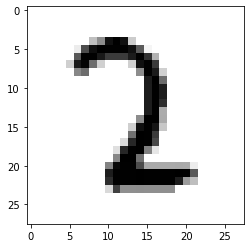

In [55]:
plot_digit(some_digit)
plt.show()